# **Simulated Annealing**
---
<img src="http://www.doc.ic.ac.uk/~afd/images/logo_imperial_college_london.png" align = "left" width=200>
 <br><br><br><br>
 
- Copyright (c) Jack Jacquier, 2023. All rights reserved

- Author: Jack Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class simulated_annealing():
    def __init__(self, f = lambda x: x**3, domain = (-1., 1.), nbsteps = 1000):
        """
        """
        self.nbsteps = nbsteps
        self.domain = domain
        self.f = f

    def plot_function(self):
        n = 1000
        xx = np.linspace(self.domain[0], self.domain[1], n)
        plt.figure(figsize=(8,3))
        plt.plot(xx, self.f(xx), 'b')
        plt.title("Function to minimise")
        plt.show()
        
    def force_to_domain(self, x):
        """
        Force x to be in a given domain
        """
        a, b = self.domain
        return max(min(x, b), a)

    def random_point(self):
        """
        Pick a point randomly in a given domain
        """
        return self.domain[0] + (self.domain[1] - self.domain[0]) * np.random.random()

    def neighbourhood(self, x, tau=1.):
        """
        Pick a point randomly in a neighbourhood
        howmuch: small values will select close to x, large values will take it further away
        """
        amp = (max(self.domain) - min(self.domain)) * tau / 10.
        delta = -.5*amp + amp * np.random.random()
        
        return self.force_to_domain(x + delta)

    def accept_proba(self, value, new_value, tau):
        if new_value < value:
            return 1.
        else:
            p = np.exp(- (new_value - value) / tau)
            return p

    def temperature(self, tau):
        """
        Annealing temperature function
        """
        return .2*max(.01, min(1., 1.-tau))
    
    def run(self):
        """
        Optimise the function self.f() by Simulated Annealing
        """
        self.xval = self.random_point()
        self.fval = self.f(self.xval)
        self.xvals, self.fvals = [self.xval], [self.fval]
        
        for step in range(self.nbsteps):
            tau = step / (1.*self.nbsteps)
            T = self.temperature(tau)
            new_xval = self.neighbourhood(self.xval, tau)
            new_fval = self.f(new_xval)
            
            if self.accept_proba(self.fval, new_fval, T) > np.random.random():
                self.xval, self.fval = new_xval, new_fval
                
            self.xvals.append(self.xval)
            self.fvals.append(self.fval)

    def annealing_plot(self):
        xaxis_steps = range(self.nbsteps+1)
        plt.figure(figsize=(12, 4))
        plt.suptitle("Minimisation by Simulated Annealing")
        plt.subplot(121)
        plt.plot(xaxis_steps, self.xvals, 'r')
        plt.plot(xaxis_steps, [self.xvals[-1] for _ in xaxis_steps], 'k')
        plt.xlabel("Number of steps")
        plt.title("argmin values")
        plt.subplot(122)
        plt.plot(xaxis_steps, self.fvals, 'b')
        plt.xlabel("Number of steps")
        plt.title("Value function")
        plt.show()

In [3]:
sa = simulated_annealing(f = lambda x: np.cos(1/x)*x, domain=(.01, 0.5), nbsteps = 100000)
#sa = simulated_annealing(f = lambda x: x**2-1, domain=(-2., 2.), nbsteps = 10000)

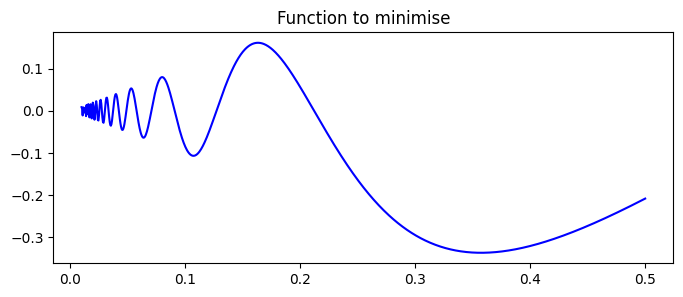

In [4]:
sa.plot_function()

In [5]:
sa.run()
print("Final argmin: ", sa.xvals[-1])
print("Final value: ", sa.fvals[-1])

Final argmin:  0.3494318624704314
Final value:  -0.3358422740713643


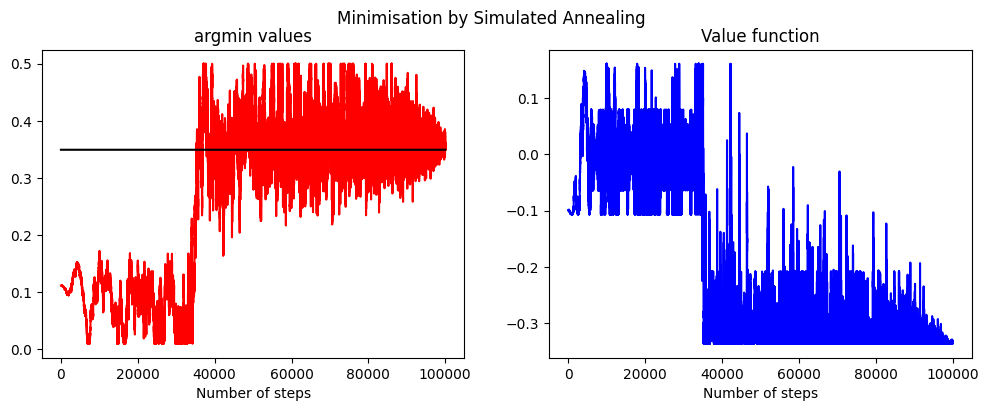

In [6]:
sa.annealing_plot()